# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [58]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [59]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [60]:
url = "http://api.openweathermap.org/data/2.5/weather?"
lat = []
lng = []
temp = []
humidity = []
cloudiness = []
wind = []
country = []
date = []
city_id=[]
good_city=[]
no_city = []

units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

for city in cities:
    try:
        weather_response = requests.get(query_url + city).json()
        good_city.append(weather_response['name'])
        city_id.append(weather_response['weather'][0]['id'])
        city_id_var = weather_response['weather'][0]['id']
        print(f'{city} with id {city_id_var} was found!')
        lat.append(weather_response["coord"]["lat"])
        lng.append(weather_response["coord"]['lon'])
        temp.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        wind.append(weather_response['wind']['speed'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
        
    except KeyError:
        print(f"We can't find city: {city}.")
        if city not in no_city:
            no_city.append(city)


ushuaia with id 800 was found!
new norfolk with id 800 was found!
We can't find city: malwan.
ribeira grande with id 804 was found!
atuona with id 800 was found!
kapaa with id 804 was found!
cherskiy with id 800 was found!
jamestown with id 600 was found!
manama with id 721 was found!
kodiak with id 600 was found!
hofn with id 600 was found!
khatanga with id 800 was found!
donskoy with id 600 was found!
makakilo city with id 800 was found!
oleksandrivka with id 600 was found!
beloha with id 501 was found!
huron with id 804 was found!
busselton with id 800 was found!
cidreira with id 800 was found!
rikitea with id 500 was found!
We can't find city: nizhneyansk.
ilulissat with id 800 was found!
bluff with id 804 was found!
punta arenas with id 800 was found!
hobart with id 801 was found!
ulladulla with id 803 was found!
barrow with id 800 was found!
colomiers with id 800 was found!
luderitz with id 800 was found!
We can't find city: taolanaro.
We can't find city: ust-kamchatsk.
We can't 

sinnamary with id 803 was found!
chilca with id 800 was found!
galle with id 804 was found!
amahai with id 802 was found!
lorengau with id 500 was found!
caravelas with id 804 was found!
arauca with id 802 was found!
pacific grove with id 804 was found!
san cristobal with id 804 was found!
mackay with id 803 was found!
ola with id 804 was found!
san jose with id 803 was found!
sabang with id 800 was found!
We can't find city: solsvik.
denizli with id 803 was found!
We can't find city: fevralsk.
nelson bay with id 803 was found!
san andres with id 803 was found!
zhigansk with id 800 was found!
saint george with id 801 was found!
kaitangata with id 500 was found!
torrijos with id 803 was found!
nanortalik with id 800 was found!
tingi with id 804 was found!
nadym with id 800 was found!
jefferson city with id 804 was found!
We can't find city: dujuma.
selma with id 804 was found!
leon with id 800 was found!
saint-leu with id 804 was found!
balikpapan with id 802 was found!
lavrentiya with 

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [84]:
weather_dict = {
    "City": good_city,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind,
    "Country": country,
    "Date": date
}
weather_data = pd.DataFrame(weather_dict)


weather_data.to_csv("Output/Weather.csv", index = False)
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,19.00,68,0,1.03,AR,1612921963
1,New Norfolk,-42.7826,147.0587,21.67,42,0,1.34,AU,1612922789
2,Ribeira Grande,38.5167,-28.7000,15.68,85,100,7.25,PT,1612922789
3,Atuona,-9.8000,-139.0333,26.42,74,0,7.68,PF,1612922789
4,Kapaa,22.0752,-159.3190,22.00,53,90,8.75,US,1612921962
...,...,...,...,...,...,...,...,...,...
408,Athabasca,54.7169,-113.2854,-26.00,63,100,5.14,CA,1612922703
409,Vila Velha,-20.3297,-40.2925,25.56,94,90,1.54,BR,1612922843
410,Kamenka,51.3223,42.7678,-10.56,90,93,3.77,RU,1612922843
411,Igurubi,-4.0000,33.7000,19.42,80,100,1.99,TZ,1612922843


In [67]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,4.130000e+02
mean,20.424861,16.406895,8.640194,76.121065,54.920097,3.467918,1.612923e+09
std,34.692791,90.948216,17.817447,17.695780,40.839502,2.538426,1.755514e+02
min,-54.800000,-179.166700,-39.000000,18.000000,0.000000,0.080000,1.612922e+09
25%,-9.106100,-65.712500,-4.910000,69.000000,4.000000,1.540000,1.612923e+09
50%,26.184200,23.666700,15.080000,82.000000,75.000000,2.820000,1.612923e+09
75%,50.233400,96.370000,23.420000,88.000000,96.000000,4.640000,1.612923e+09
max,78.218600,177.483300,34.000000,100.000000,100.000000,15.000000,1.612923e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [69]:
weather_data[weather_data['Humidity'] > 100] 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [70]:
#  Get the indices of cities that have humidity over 100%.


In [71]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

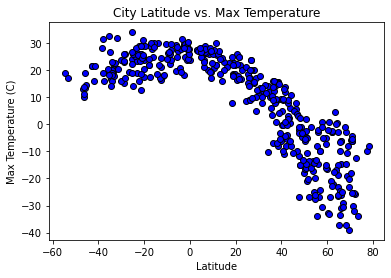

This graph is showing the relationship between latitude and maximum temperature. This graph shows that temperatures tend to be higher closer to the equator. 


In [72]:
x_values = weather_data['Lat']
y_values = weather_data['Max Temp']

plt.scatter(x_values, y_values, marker="o", facecolors="blue",
           edgecolors ="black")

plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.savefig("Images/LatvsTemp.png")
plt.show()

print("This graph is showing the relationship between latitude and maximum temperature. This graph shows that temperatures tend to be higher closer to the equator. ")

## Latitude vs. Humidity Plot

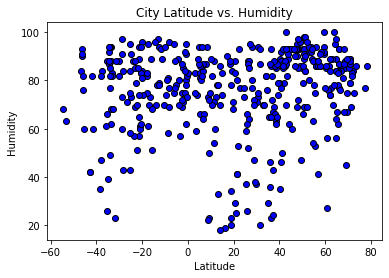

This graph is showing the relationship between latitude and humidity. This graph shows that there is not a strong relationship between latitude and humidity.


In [73]:
x_values = weather_data['Lat']
y_values = weather_data['Humidity']

plt.scatter(x_values, y_values, marker="o", facecolors="blue",
           edgecolors ="black")

plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig("Images/LatvsHumidity.png")
plt.show()
print("This graph is showing the relationship between latitude and humidity. This graph shows that there is not a strong relationship between latitude and humidity.")

## Latitude vs. Cloudiness Plot

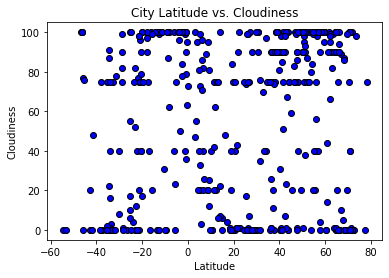

This graph is showing the relationship between latitude and cloudiness. This graph shows that there is not a strong relationship between latitude and cloudiness.


In [74]:
x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']

plt.scatter(x_values, y_values, marker="o", facecolors="blue",
           edgecolors ="black")

plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("Images/LatvsClouds.png")
plt.show()
print("This graph is showing the relationship between latitude and cloudiness. This graph shows that there is not a strong relationship between latitude and cloudiness.")

## Latitude vs. Wind Speed Plot

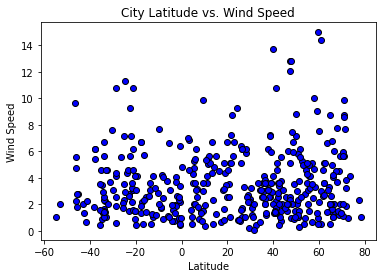

This graph is showing the relationship between latitude and wind speed. This graph shows that there is not a strong relationship between latitude and wind speed.


In [75]:
x_values = weather_data['Lat']
y_values = weather_data['Wind Speed']

plt.scatter(x_values, y_values, marker="o", facecolors="blue",
           edgecolors ="black")

plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig("Images/LatvsWind.png")
plt.show()
print("This graph is showing the relationship between latitude and wind speed. This graph shows that there is not a strong relationship between latitude and wind speed.")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.75732879389356


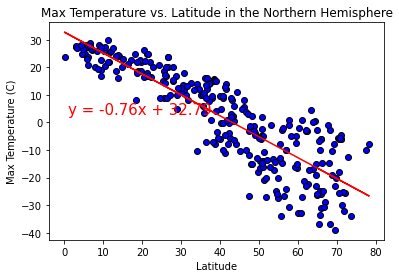

There is a strong relationship between latitude and max temperature in the Northern Hemisphere -- as the latitude approaches 0 (the equator) temperature goes up.


In [76]:
northern = pd.DataFrame(weather_data.loc[weather_data['Lat'] >= 0])

# Print out the r-squared value along with the plot.
x_values = northern['Lat']
y_values = northern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue",
           edgecolors ="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,3),fontsize=15,color="red")
plt.title('Max Temperature vs. Latitude in the Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Images/NorthernTemp.png")
plt.show()
print("There is a strong relationship between latitude and max temperature in the Northern Hemisphere -- as the latitude approaches 0 (the equator) temperature goes up.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.2637929923285559


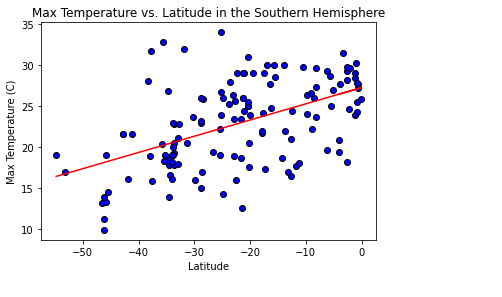

There is a weaker relationship between latitude and max temperature in the Southern Hemisphere -- less than 50%.


In [77]:
southern = pd.DataFrame(weather_data.loc[weather_data['Lat'] < 0])

# Print out the r-squared value along with the plot.
x_values = southern['Lat']
y_values = southern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue",
           edgecolors ="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,3),fontsize=15,color="red")
plt.title('Max Temperature vs. Latitude in the Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Images/SouthernTemp.png")
plt.show()
print("There is a weaker relationship between latitude and max temperature in the Southern Hemisphere -- less than 50%.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.07110854588516513


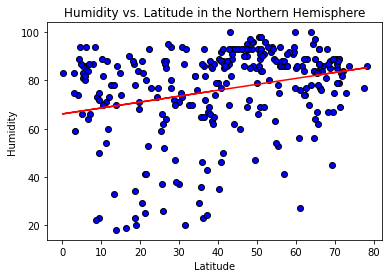

There is a a no relationship between latitude and humidity in the Northern Hemisphere.


In [78]:
northern = pd.DataFrame(weather_data.loc[weather_data['Lat'] >= 0])

# Print out the r-squared value along with the plot.
x_values = northern['Lat']
y_values = northern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue",
           edgecolors ="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,3),fontsize=15,color="red")
plt.title('Humidity vs. Latitude in the Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Images/NorthernHumidity.png")
plt.show()
print("There is a a no relationship between latitude and humidity in the Northern Hemisphere.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.033164519806202705


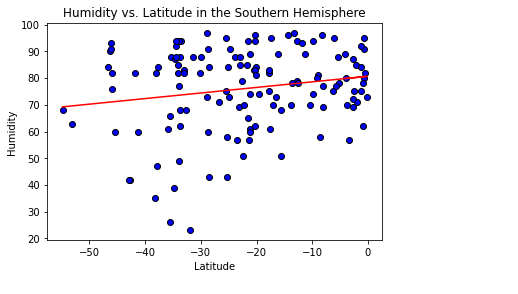

There is a no relationship between latitude and humidity in the Southern Hemisphere.


In [79]:
southern = pd.DataFrame(weather_data.loc[weather_data['Lat'] < 0])

# Print out the r-squared value along with the plot.
x_values = southern['Lat']
y_values = southern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue",
           edgecolors ="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,3),fontsize=15,color="red")
plt.title('Humidity vs. Latitude in the Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Images/SouthernHumidity.png")
plt.show()
print("There is a no relationship between latitude and humidity in the Southern Hemisphere.")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.019618720455276364


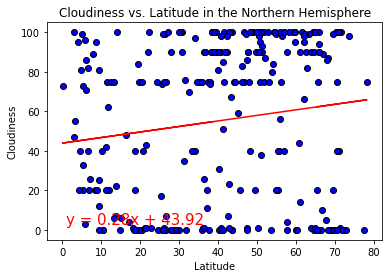

There is no relationship between latitude and cloudiness in the Northern Hemisphere.


In [80]:
northern = pd.DataFrame(weather_data.loc[weather_data['Lat'] >= 0])

# Print out the r-squared value along with the plot.
x_values = northern['Lat']
y_values = northern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue",
           edgecolors ="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,3),fontsize=15,color="red")
plt.title('Cloudiness vs. Latitude in the Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Images/NothernClouds.png")
plt.show()
print("There is no relationship between latitude and cloudiness in the Northern Hemisphere.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.16591369745863943


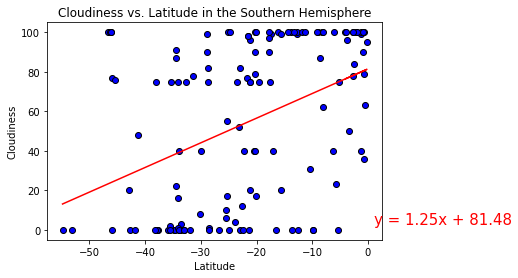

There is a no relationship between latitude and cloudiness in the Southern Hemisphere.


In [81]:
southern = pd.DataFrame(weather_data.loc[weather_data['Lat'] < 0])

# Print out the r-squared value along with the plot.
x_values = southern['Lat']
y_values = southern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue",
           edgecolors ="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,3),fontsize=15,color="red")
plt.title('Cloudiness vs. Latitude in the Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Images/SouthernClouds.png")
plt.show()
print("There is a no relationship between latitude and cloudiness in the Southern Hemisphere.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.002301726419214457


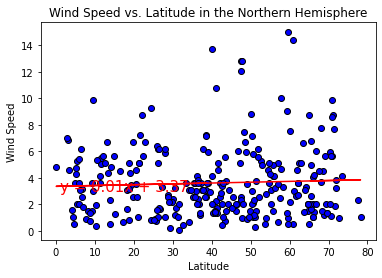

There is no relationship between latitude and wind speed in the Northern Hemisphere.


In [82]:
northern = pd.DataFrame(weather_data.loc[weather_data['Lat'] >= 0])

# Print out the r-squared value along with the plot.
x_values = northern['Lat']
y_values = northern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue",
           edgecolors ="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,3),fontsize=15,color="red")
plt.title('Wind Speed vs. Latitude in the Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Images/NorthernWind.png")
plt.show()
print("There is no relationship between latitude and wind speed in the Northern Hemisphere.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.017403154713793164


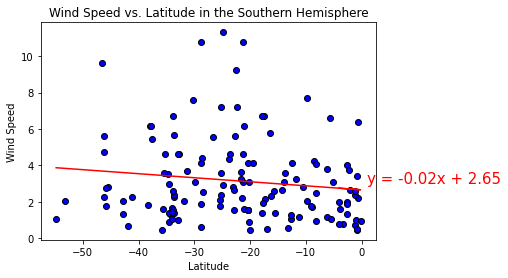

There is no relationship between latitude and win speed in the Southern Hemisphere.


In [83]:
southern = pd.DataFrame(weather_data.loc[weather_data['Lat'] < 0])

# Print out the r-squared value along with the plot.
x_values = southern['Lat']
y_values = southern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="blue",
           edgecolors ="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,3),fontsize=15,color="red")
plt.title('Wind Speed vs. Latitude in the Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")

plt.savefig("Images/SouthernWind.png")
plt.show()
print("There is no relationship between latitude and win speed in the Southern Hemisphere.")
